In [1]:
# Import libraries 
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io

In [2]:
# Load dataset
os.listdir("/kaggle/input")
df = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")

In [3]:

display(Markdown("""### Question should be asked at this step:
- 1.  What is the shape of the dataset?
- 2.  Does this size make sense for modeling, or is it too small/too big?
- 3.  What types of features do I have? (Numerical, Categorical, Text, Dates, Coordinates?)
- 4.  Any features with wrong types? (e.g., dates stored as strings?)
- 5.  Which columns have missing values?
- 6.  Are they random or do they follow a pattern?
- 7.  Should I impute, drop, or create an indicator for missingness?
- 8.  What are the min, max, mean, median, and std of numeric columns?
- 9.  Are there skewed distributions?
- 10. Any unrealistic values or outliers?
- 11. How is the target variable (price) distributed?
- 12. Does it have skewness or extreme outliers?
- 13. What’s the range and variance?
- 14. Any duplicate rows or columns?
- 15. Do some columns carry the same information (e.g., postcode vs outcode)?
- 16. Any ID columns with no analytical value?
- 17. Do latitude and longitude match known regions in London?
- 18. Are there clusters by postcode or outcode?
- 19. Which features might affect house prices? (Bedrooms? Location? Property type? Area?)
- 20. Are there engineered features I can create? (e.g., price_per_sqm, is_flat, property_age"""))

# Intial exploration 
# DataFrame Shape
display(Markdown("### 🧾 DataFrame Shape"))
display(Markdown(f"`{df.shape}`"))

# DataFrame Info
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()

display(Markdown("### 🧾 DataFrame Info"))
display(Markdown(f"```\n{info_str}\n```"))

# DataFrame Describe
display(Markdown("### 🧾 DataFrame Describe"))
display(df.describe())

#Duplicated rows
display(Markdown("### 🧾 Duplicated Rows"))
display(df.duplicated().sum())


### Question should be asked at this step:
- 1.  What is the shape of the dataset?
- 2.  Does this size make sense for modeling, or is it too small/too big?
- 3.  What types of features do I have? (Numerical, Categorical, Text, Dates, Coordinates?)
- 4.  Any features with wrong types? (e.g., dates stored as strings?)
- 5.  Which columns have missing values?
- 6.  Are they random or do they follow a pattern?
- 7.  Should I impute, drop, or create an indicator for missingness?
- 8.  What are the min, max, mean, median, and std of numeric columns?
- 9.  Are there skewed distributions?
- 10. Any unrealistic values or outliers?
- 11. How is the target variable (price) distributed?
- 12. Does it have skewness or extreme outliers?
- 13. What’s the range and variance?
- 14. Any duplicate rows or columns?
- 15. Do some columns carry the same information (e.g., postcode vs outcode)?
- 16. Any ID columns with no analytical value?
- 17. Do latitude and longitude match known regions in London?
- 18. Are there clusters by postcode or outcode?
- 19. Which features might affect house prices? (Bedrooms? Location? Property type? Area?)
- 20. Are there engineered features I can create? (e.g., price_per_sqm, is_flat, property_age

### 🧾 DataFrame Shape

`(266325, 17)`

### 🧾 DataFrame Info

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year            266325 non-null  int64  
 16  price                266325 non-null  int64  
dtypes: float64(6), int64(4), object(7)
memory usage: 34.5+ MB

```

### 🧾 DataFrame Describe

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,266325.000000,266325.000000,266325.000000,217846.000000,241482.000000,252519.000000,229285.000000,266325.000000,266325.000000,2.663250e+05
mean,133162.000000,51.510090,-0.104639,1.439471,2.496140,99.624088,1.292160,6.805670,2012.213855,6.161788e+05
std,76881.549558,0.056709,0.088074,0.721365,1.172209,56.454683,0.583029,3.356693,9.143113,1.274105e+06
min,0.000000,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,1.000000,1995.000000,1.000000e+04
25%,66581.000000,51.466685,-0.159167,1.000000,2.000000,63.000000,1.000000,4.000000,2004.000000,2.165000e+05
50%,133162.000000,51.507202,-0.108622,1.000000,2.000000,85.000000,1.000000,7.000000,2014.000000,3.850000e+05
75%,199743.000000,51.550937,-0.049202,2.000000,3.000000,118.000000,1.000000,10.000000,2021.000000,6.500000e+05
max,266324.000000,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,12.000000,2023.000000,1.000000e+08


### 🧾 Duplicated Rows

0

In [4]:
# Based on info() and describe(), Let's start data cleaning 
# Handling Missing Values
display(Markdown("""### 🧾 1. Handling missing values:
- Impute missing values for numerical features (e.g., 'bedrooms', 'bathrooms') using the median to avoid the influence of outliers.
- For categorical features (e.g., 'propertyType', 'tenure'), fill missing values with the mode (most frequent value).
- Avoid dropping rows for important features like 'bedrooms' (with ~10% missing), as it may lead to loss of valuable data."""))

# Impute missing values for numerical columns (e.g., median imputation)
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['livingRooms'] = df['livingRooms'].fillna(df['livingRooms'].median())
df['floorAreaSqM'] = df['floorAreaSqM'].fillna(df['floorAreaSqM'].median())


# Impute categorical columns with mode
df['tenure'] = df['tenure'].fillna(df['tenure'].mode()[0])
df['propertyType'] = df['propertyType'].fillna(df['propertyType'].mode()[0])
df['currentEnergyRating'] = df['currentEnergyRating'].fillna(df['currentEnergyRating'].mode()[0])

### 🧾 1. Handling missing values:
- Impute missing values for numerical features (e.g., 'bedrooms', 'bathrooms') using the median to avoid the influence of outliers.
- For categorical features (e.g., 'propertyType', 'tenure'), fill missing values with the mode (most frequent value).
- Avoid dropping rows for important features like 'bedrooms' (with ~10% missing), as it may lead to loss of valuable data.

### 🧾 2. Handle Outliers
- Outliers are extreme values that can distort the results of data analysis and model training.
- They can be detected using methods like IQR, Z-score, or visualizations (boxplots, scatter plots).
- In this case, we're focusing on handling outliers for key numeric columns like 'price', 'floorAreaSqM', etc.
- We chose to remove extreme outliers using IQR method for simplicity and effectiveness.
- More advanced methods like log transformation or robust models exist but are not used here to keep the pipeline clean and interpretable.
- ✅ Replacing missing (null) values with median is a common and safe practice,
- especially when the percentage of missing data is low and the column is skewed.
- ❌ But replacing outliers with median is discouraged as it removes real (but extreme) observations.
- It's better to analyze or transform outliers instead of just masking them.

### IQR (Price): 

433500.0


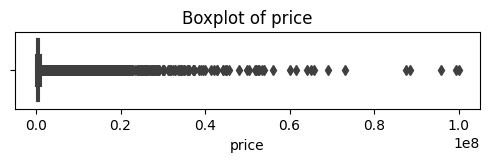

### IQR (floorAreaSqM): 

46.0


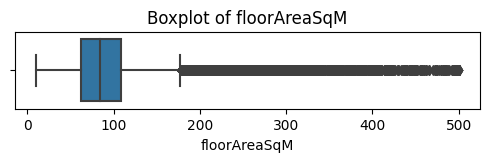

### IQR (bathrooms): 

0.0


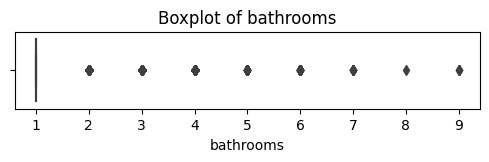

### IQR (bedrooms): 

1.0


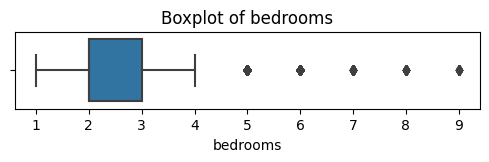

### IQR (livingRooms): 

0.0


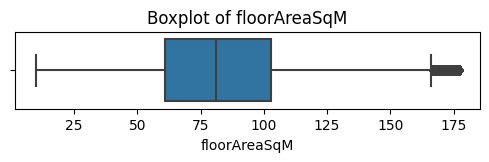

In [5]:
# Handling Outliers 
display(Markdown("""### 🧾 2. Handle Outliers
- Outliers are extreme values that can distort the results of data analysis and model training.
- They can be detected using methods like IQR, Z-score, or visualizations (boxplots, scatter plots).
- In this case, we're focusing on handling outliers for key numeric columns like 'price', 'floorAreaSqM', etc.
- We chose to remove extreme outliers using IQR method for simplicity and effectiveness.
- More advanced methods like log transformation or robust models exist but are not used here to keep the pipeline clean and interpretable.
- ✅ Replacing missing (null) values with median is a common and safe practice,
- especially when the percentage of missing data is low and the column is skewed.
- ❌ But replacing outliers with median is discouraged as it removes real (but extreme) observations.
- It's better to analyze or transform outliers instead of just masking them."""))

# Calculate IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (Price): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['price'])
plt.title('Boxplot of price')
plt.show()

# Filter out outliers based on IQR
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

#💡 Why 1.5?
# The 1.5 is a rule of thumb to give a reasonable range
# It helps flag values that are much smaller or much larger than the majority
# In most cases, yes — we use 1.5 * IQR to detect outliers
#🚨 But there are also other thresholds:
# Multiplier | Used For             | Meaning
# 1.5        | 🟡 Mild Outliers    | Most common for basic outlier detection
# 3.0        | 🔴 Extreme Outliers | Used when you want to detect only very unusual values

# Calculate IQR for the 'floorAreaSqM' column
Q1 = df['floorAreaSqM'].quantile(0.25)
Q3 = df['floorAreaSqM'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (floorAreaSqM): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['floorAreaSqM'])
plt.title('Boxplot of floorAreaSqM')
plt.show()

# Filter out outliers based on IQR
df = df[(df['floorAreaSqM'] >= (Q1 - 1.5 * IQR)) & (df['floorAreaSqM'] <= (Q3 + 1.5 * IQR))]

# Calculate IQR for the 'bathrooms' column
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (bathrooms): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot of bathrooms')
plt.show()

# Calculate IQR for the 'bedrooms' column
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (bedrooms): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot of bedrooms')
plt.show()


# Calculate IQR for the 'livingRooms' column
Q1 = df['livingRooms'].quantile(0.25)
Q3 = df['livingRooms'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (livingRooms): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['floorAreaSqM'])
plt.title('Boxplot of floorAreaSqM')
plt.show()

# Outlier Detection Strategy:
# - Used IQR for features with sufficient spread (e.g., floorAreaSqM, price).
# - Skipped IQR for features like bathrooms/livingRooms where IQR = 0.
# - For such features, considered valid upper limits or domain-based thresholds.
# - IQR is not ideal when data is heavily skewed or lacks spread; alternatives like percentiles or manual capping may work better.

#Detail Interpretation for livivngRooms same applies to other variables like bathroom and bedroom
# ✅ Interpretation:
# Over 92% of the values are 1.0 (211,437 out of ~229,000).
# Very few entries have more than 2 living rooms.
# This is a right-skewed distribution, not a case where IQR is helpful.
# ✅ What to do:
# Don’t use IQR for outlier detection here.
# You can either:
# Leave as is
# Or flag rows with livingRooms > 5 as rare/extreme if it helps modeling.

In [6]:
display(Markdown("""### 🧾 3. Covert Datatypes
- Convert columns like sale_month and sale_year to integers, 
and make sure the ID column is not treated as a numerical value for modeling purposes."""))

# Convert columns to appropriate types
df['sale_month'] = df['sale_month'].astype(int)
df['sale_year'] = df['sale_year'].astype(int)
df['livingRooms'] = df['livingRooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['ID'] = df['ID'].astype(str)

# The 'ID' column is just an identifier and holds no predictive value.
# Including it as a numeric feature can mislead the model by introducing noise.
# Therefore, we will drop it before training.

### 🧾 3. Covert Datatypes
- Convert columns like sale_month and sale_year to integers, 
and make sure the ID column is not treated as a numerical value for modeling purposes.